In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/pandas_GIS/notebook

/content/drive/MyDrive/pandas_GIS/notebook


In [3]:
!pip install geopandas
!pip install mapclassify
!pip install pysal==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 16.7 MB 63.4 MB/s 
     |████████████████████████████████| 6.3 MB 53.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.9 MB 1.3 MB/s 
  Created wheel for pysal: filename=pysal-2.0.0-py3-none-any.whl size=25231765 sha256=1617f9fbe4afc51b0a04e3580ae605262afdaa79334abef330a746fdc11a6896
  Stored in directory: /root/.cache/pip/wheels/8d/42/fd/e6187fb8ce1701d471d18be675eb3c6d79353839d8a6094831
Successfully built pysal


In [4]:
import geopandas as gpd
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [5]:
villages_shp = gpd.read_file('../geodata/台灣里界圖_TWD97/Village_NLSC_121_1050219.shp')

In [6]:
villages_shp.head()

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
0,8573,7064,64,64,6401000,6401000-013,中興里,旗津區,高雄市,中興里,"POLYGON ((177607.758 2497521.111, 177630.724 2..."
1,8578,3626,10,10007,1000712,1000712-006,頂潭里,田中鎮,彰化縣,頂潭里,"POLYGON ((207765.541 2641446.581, 207796.390 2..."
2,8579,3627,10,10007,1000712,1000712-007,中潭里,田中鎮,彰化縣,中潭里,"POLYGON ((207195.132 2641217.485, 207196.409 2..."
3,8580,3628,10,10007,1000712,1000712-008,龍潭里,田中鎮,彰化縣,龍潭里,"POLYGON ((206697.079 2641761.284, 206702.181 2..."
4,8581,3642,10,10007,1000712,1000712-022,大社里,田中鎮,彰化縣,大社里,"POLYGON ((206697.079 2641761.284, 206692.842 2..."


In [7]:
import pandas as pd

In [8]:
census_villages = pd.read_csv('../geodata/104年12月人口數.csv', skiprows=[0])

In [9]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,96歲-男,96歲-女,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,1,0,0,0,0,1,0,0,0,1
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,1,0,0,0,0,0,0,0,0,0
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,0,0,1,0,0
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,0,0,1,1
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,1,0,0,0,0,0,0,0


In [10]:
census_villages['city'] = census_villages['區域別'].copy(deep=True)
census_villages['city'] = census_villages['city'].apply(lambda t: t[:3])

census_villages['district'] = census_villages['區域別'].copy(deep=True)
census_villages['district'] = census_villages['district'].apply(lambda t: t[3:])

# census_villages = census_villages[['city', 'district', '村里', '人口數']]

In [11]:
census_villages.head()

,統計年月,區域別,村里,戶數,人口數,人口數-男,人口數-女,0歲-男,0歲-女,1歲-男,...,97歲-男,97歲-女,98歲-男,98歲-女,99歲-男,99歲-女,100歲以上-男,100歲以上-女,city,district
0,10412,新北市板橋區,留侯里,691,1649,786,863,5,8,10,...,0,0,0,1,0,0,0,1,新北市,板橋區
1,10412,新北市板橋區,流芳里,638,1564,732,832,3,3,8,...,0,0,0,0,0,0,0,0,新北市,板橋區
2,10412,新北市板橋區,赤松里,318,838,410,428,3,2,3,...,0,0,0,0,0,1,0,0,新北市,板橋區
3,10412,新北市板橋區,黃石里,444,1191,579,612,3,2,4,...,0,0,0,0,0,0,1,1,新北市,板橋區
4,10412,新北市板橋區,挹秀里,737,1796,875,921,2,6,1,...,1,0,0,0,0,0,0,0,新北市,板橋區


In [12]:
demo_villages = ['惠楠里', '惠民里', '惠豐里', '莒光里', '合群里', '永清里', '橋頭里', '橋南里']
kaohsiung_villages_shp = villages_shp[villages_shp['C_Name']=='高雄市']

kaohsiung_villages_shp = kaohsiung_villages_shp[['C_Name', 'T_Name', 'V_Name', 'geometry']]

demo_villages_shp = kaohsiung_villages_shp[
    kaohsiung_villages_shp['V_Name'].apply(
        lambda t: True if t in demo_villages else False
    )
]

In [13]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [14]:
kaohsiung_census_villages = census_villages[census_villages['city'] == '高雄市']

demo_census_villages = kaohsiung_census_villages[kaohsiung_census_villages["村里"].isin(demo_villages)]

In [15]:
demo_census_villages = demo_census_villages[['city', 'district', '村里', '人口數']]

In [16]:
demo_census_villages

,city,district,村里,人口數
3430,高雄市,左營區,永清里,1288
3431,高雄市,左營區,莒光里,2024
3433,高雄市,左營區,合群里,2656
3463,高雄市,楠梓區,惠楠里,3533
3464,高雄市,楠梓區,惠民里,4514
3465,高雄市,楠梓區,惠豐里,5407
4020,高雄市,橋頭區,橋頭里,2550
4021,高雄市,橋頭區,橋南里,1299


In [17]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
16,高雄市,左營區,永清里,"POLYGON ((177943.168 2510441.206, 177941.344 2..."
17,高雄市,左營區,莒光里,"POLYGON ((177698.008 2511983.979, 177779.229 2..."
2675,高雄市,左營區,合群里,"POLYGON ((177309.430 2511593.884, 177310.425 2..."
2705,高雄市,楠梓區,惠楠里,"POLYGON ((181185.031 2514217.983, 181183.969 2..."
2706,高雄市,楠梓區,惠民里,"POLYGON ((180715.716 2514977.993, 180718.122 2..."
2707,高雄市,楠梓區,惠豐里,"POLYGON ((179848.500 2515160.500, 179859.625 2..."
3208,高雄市,橋頭區,橋頭里,"POLYGON ((179476.094 2517763.750, 179443.297 2..."
3209,高雄市,橋頭區,橋南里,"POLYGON ((179887.688 2517777.250, 179928.375 2..."


In [18]:
demo_villages_shp_group = demo_villages_shp.groupby(by=['C_Name', 'T_Name'], as_index=False)

In [19]:
import shapely

In [20]:
demo_district_shp = gpd.GeoDataFrame(
    demo_villages_shp_group['geometry'].agg(lambda t: shapely.ops.unary_union(t)))

In [21]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


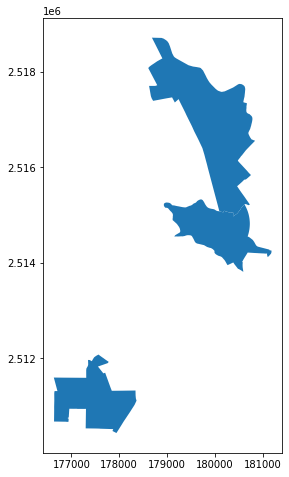

In [22]:
demo_district_shp.plot(figsize=(6,8))

In [23]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [24]:
demo_census_villages_group = demo_census_villages.groupby(by=['city', 'district'], as_index=False)

In [25]:
demo_census_district = demo_census_villages_group['人口數'].sum()

In [26]:
demo_census_district

,city,district,人口數
0,高雄市,左營區,5968
1,高雄市,楠梓區,13454
2,高雄市,橋頭區,3849


In [27]:
demo_district_shp

,C_Name,T_Name,geometry
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2..."
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2..."
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2..."


In [28]:
demo_census_district_shp = demo_district_shp.merge(
    demo_census_district,left_on=('C_Name', 'T_Name'),right_on=('city', 'district'))

In [29]:
demo_census_district_shp

,C_Name,T_Name,geometry,city,district,人口數
0,高雄市,左營區,"POLYGON ((177941.344 2510438.366, 177858.176 2...",高雄市,左營區,5968
1,高雄市,楠梓區,"POLYGON ((181183.969 2514213.028, 181178.496 2...",高雄市,楠梓區,13454
2,高雄市,橋頭區,"POLYGON ((179928.375 2517730.000, 180017.094 2...",高雄市,橋頭區,3849


In [30]:
demo_census_district_shp = gpd.GeoDataFrame(demo_census_district_shp)

In [31]:
import matplotlib.pyplot as plt

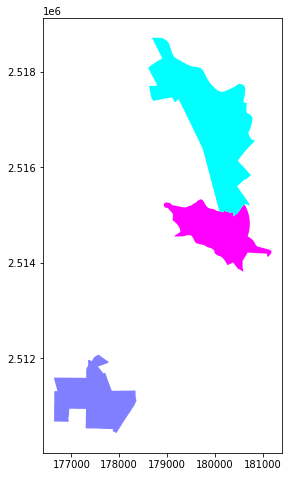

In [32]:
demo_census_district_shp.plot(column='人口數', scheme='QUANTILES', k=3, cmap='cool',figsize=(6,8))